# Imports

In [94]:
import pandas as pd
import tifffile as tif
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

# Function Definitions

In [4]:
def stitch_images_iteratively(images):
    stitched_images=[]
    for i in np.arange(0,len(images)-1,2):
        stitcher = cv2.Stitcher_create()
        (status, stitched) = stitcher.stitch(images[i],images[i+1])
        if status:
            stitched_images.append(stitched)
            print(i)
        else:
            print("{} failed",i)
    if len(images)%2:
        stitched_images.append(images[-1])
    return stitched_images

# Load data

building off of https://www.pyimagesearch.com/2018/12/17/image-stitching-with-opencv-and-python/ 

In [5]:
fld = '/Users/emilydennis/Desktop/tile_test_data/'
images=[]
for file in sorted(os.listdir(fld)):
    if 'JPG' in file:
        print(file)
        im = cv2.imread(os.path.join(fld,file))
        images.append(im)

P1110201.JPG
P1110202.JPG
P1110203.JPG
P1110204.JPG
P1110205.JPG
P1110206.JPG
P1110207.JPG
P1110208.JPG
P1110209.JPG
P1110210.JPG
P1110211.JPG
P1110212.JPG
P1110213.JPG
P1110214.JPG
P1110215.JPG
P1110216.JPG
P1110217.JPG
P1110218.JPG
P1110219.JPG
P1110220.JPG
P1110221.JPG
P1110222.JPG
P1110223.JPG
P1110224.JPG
P1110225.JPG
P1110226.JPG
P1110227.JPG
P1110228.JPG
P1110229.JPG
P1110230.JPG
P1110231.JPG
P1110232.JPG
P1110233.JPG
P1110234.JPG
P1110235.JPG
P1110236.JPG
P1110237.JPG
P1110238.JPG
P1110239.JPG
P1110240.JPG
P1110241.JPG
P1110242.JPG
P1110243.JPG
P1110244.JPG
P1110245.JPG
P1110246.JPG
P1110247.JPG
P1110248.JPG
P1110249.JPG
P1110250.JPG
P1110251.JPG
P1110252.JPG
P1110253.JPG
P1110254.JPG


In [7]:
stitcher = cv2.Stitcher_create()
(status, stitched) = stitcher.stitch(images[2:4],)

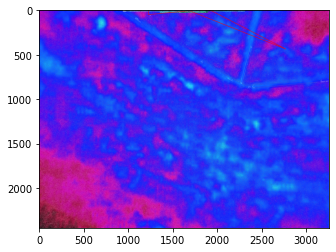

In [150]:
image2 = np.squeeze(images[3])
image3 = np.squeeze(images[4])
plt.imshow(image2)

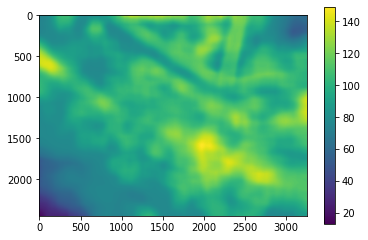

In [148]:
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
gray2=cv2.medianBlur(gray,201)
plt.imshow(newgray)
plt.colorbar()

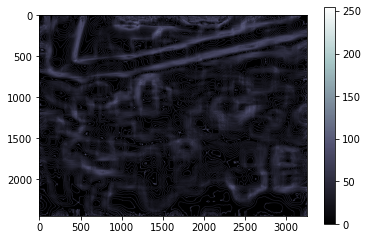

In [87]:
descriptor2 = cv2.Canny(newgray,0,.2)
#(kps, features) = descriptor.detectAndCompute(gray, None)
plt.imshow(descriptor2,cmap='bone')
plt.colorbar()

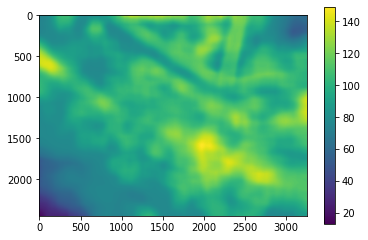

In [145]:
gray = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
gray3=cv2.medianBlur(gray,201)
plt.imshow(newgray)
plt.colorbar()

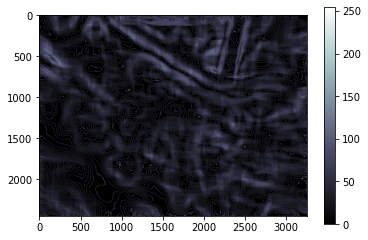

In [89]:

descriptor3 = cv2.Canny(newgray,0,.2)
#(kps, features) = descriptor.detectAndCompute(gray, None)
plt.imshow(descriptor3,cmap='bone')
plt.colorbar()

In [93]:
stitcher = cv2.Stitcher_create()
(status, stitched) = stitcher.stitch([descriptor2,descriptor3])
status

1

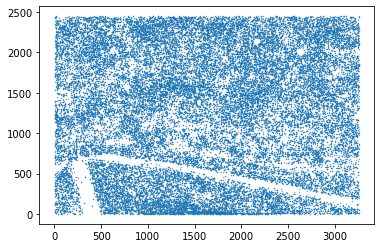

In [20]:
plt.scatter(kps2[:,0],kps2[:,1],0.1)

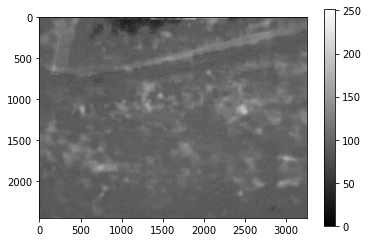

In [38]:
plt.imshow(gray,cmap='gray')
plt.colorbar()

In [87]:
final_stitched_image=images
progress_stitch = []
while len(final_stitched_image)!=1:
    print("length is {}... now stitching".format(len(final_stitched_image)))
    final_stitched_image = stitch_images_iteratively(final_stitched_image)
    progress_stitch.append(final_stitched_image)

length is 54... now stitching
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
length is 27... now stitching
0
2
4
6
8
10
12
14
16
18
20
22
24
length is 14... now stitching
0
2
4
6
8
10
12
length is 7... now stitching
0
2
4
length is 4... now stitching
0
2
length is 2... now stitching
0


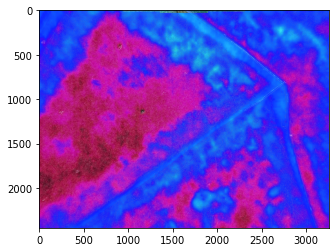

In [125]:
plt.imshow(final_stitched_image[0])

In [126]:
# ok this doesn't work - it ends up merging everything 
# - either need to try jpgs or make all same scale first or use x.y info

In [117]:

MIN_MATCH_COUNT = 10
img1 = gray3
img2 = gray2

In [137]:
?cv2.ORB_create

Docstring:
ORB_create([, nfeatures[, scaleFactor[, nlevels[, edgeThreshold[, firstLevel[, WTA_K[, scoreType[, patchSize[, fastThreshold]]]]]]]]]) -> retval
.   @brief The ORB constructor
.   
.       @param nfeatures The maximum number of features to retain.
.       @param scaleFactor Pyramid decimation ratio, greater than 1. scaleFactor==2 means the classical
.       pyramid, where each next level has 4x less pixels than the previous, but such a big scale factor
.       will degrade feature matching scores dramatically. On the other hand, too close to 1 scale factor
.       will mean that to cover certain scale range you will need more pyramid levels and so the speed
.       will suffer.
.       @param nlevels The number of pyramid levels. The smallest level will have linear size equal to
.       input_image_linear_size/pow(scaleFactor, nlevels - firstLevel).
.       @param edgeThreshold This is size of the border where the features are not detected. It should
.       roughly match th

In [140]:
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w,d = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

Not enough matches are found - 0/10


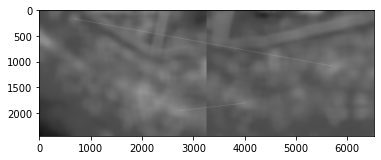

In [134]:
draw_params = dict(matchColor = (255,255,255), # draw matches in green color
                   flags = 2)
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3)
plt.show()